####1. Sampling Model Parameters and Estimates

- The task of statistical inference is to estimate an unknown population parameter using observed data from a sample.
- In a sampling model, the collection of elements in the urn is called the *population*.
- A *parameter* is a number that summarizes data for an entire population.
- A *sample* is observed data from a subset of the population.
- An *estimate* is a summary of the observed data about a parameter that we believe is informative. It is a data-driven guess of the population parameter.
- We want to predict the proportion of the blue beads in the urn, the parameter  *p* . The proportion of red beads in the urn is  *1−p*  and the *spread* is  *2p−1* .
- The sample proportion is a random variable. Sampling gives random results drawn from the population distribution.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



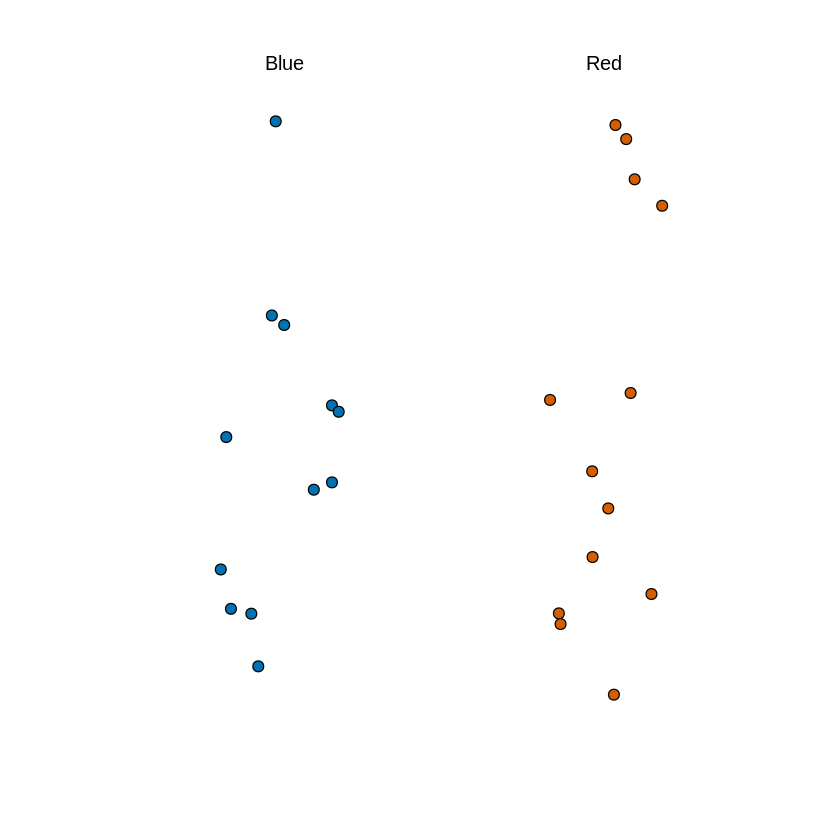

In [4]:
install.packages("dslabs")
library(tidyverse)
library(dslabs)
take_poll(25)    # draw 25 beads

####2. The Sample Average

- Many common data science tasks can be framed as estimating a parameter from a sample.
- We illustrate statistical inference by walking through the process to estimate  p . From the estimate of  p , we can easily calculate an estimate of the spread,  2p−1 .
- Consider the random variable  X  that is 1 if a blue bead is chosen and 0 if a red bead is chosen. The proportion of blue beads in  N  draws is the average of the draws  $X_{1},...,X_{N}$ .
- $\overline{X}$  is the sample average. In statistics, a bar on top of a symbol denotes the average. $\overline{X}$ is a random variable because it is the average of random draws - each time we take a sample,  $\overline{X}$  is different.
$\overline{X}=\frac{X_{1}+X_{2}+...+X_{N}}{N}$
- The number of blue beads drawn in N draws,$N\overline{X}$, is  N  times the proportion of values in the urn. However, we do not know the true proportion: we are trying to estimate this parameter  p .

####3. Polling versus Forecasting

- A poll taken in advance of an election estimates  p  for that moment, not for election day.
- In order to predict election results, forecasters try to use early estimates of  p  to predict  p  on election day. We discuss some approaches in later sections.

####4. Properties of Estimate

- When interpreting values of  $\overline{X}$ , it is important to remember that  $\overline{X}$  is a random variable with an expected value and standard error that represents the sample proportion of positive events.
- The expected value of  $\overline{X}$  is the parameter of interest  p . This follows from the fact that  $\overline{X}$ is the sum of independent draws of a random variable times a constant  1/N .
    $E(\overline{X})=p$ 
- As the number of draws  N  increases, the standard error of our estimate $\overline{X}$ decreases. The standard error of the average of  $\overline{X}$  over  N  draws is:
$SE(\overline{X}) = \sqrt{\frac{p(1-p)}{N}}$
- In theory, we can get more accurate estimates of  p  by increasing  N . In practice, there are limits on the size of  N  due to costs, as well as other factors we discuss later.
- We can also use other random variable equations to determine the expected value of the sum of draws  E(S)  and standard error of the sum of draws  SE(S) .
$E(S)=Np$ </br> 
$SE(S)=\sqrt{Np(1−p)}$

## Assessment

Exercise 1. Polling - expected value of S
Suppose you poll a population in which a proportion p of voters are Democrats and 1-p are Republicans. Your sample size is N=25 . Consider the random variable S , which is the total number of Democrats in your sample.

What is the expected value of this random variable ?

$E(S) = 25p$

Exercise 2. Polling - standard error of S
Again, consider the random variable S, which is the total number of Democrats in your sample of 25 voters. The variable p describes the proportion of Democrats in the sample, whereas 1-p describes the proportion of Republicans.

What is the standard error of S?

$SE(S)=\sqrt{25p(1-p)}$

Exercise 3. Polling - expected value of X-bar
Consider the random variable $S/N$, which is equivalent to the sample average that we have been denoting as $\overline{X}$. The variable $N$ represents the sample size and $p$ is the proportion of Democrats in the population.

What is the expected value of $\overline{X}$
?

$E(\overline{X})=p$

Exercise 4. Polling - standard error of X-bar
What is the standard error of the sample average, $\overline{X}$
?

The variable $N$ represents the sample size and p is the proportion of Democrats in the population.

$SE(\overline{X}) = \sqrt{\frac{p(1-p)}{N}}$

Exercise 5. se versus p

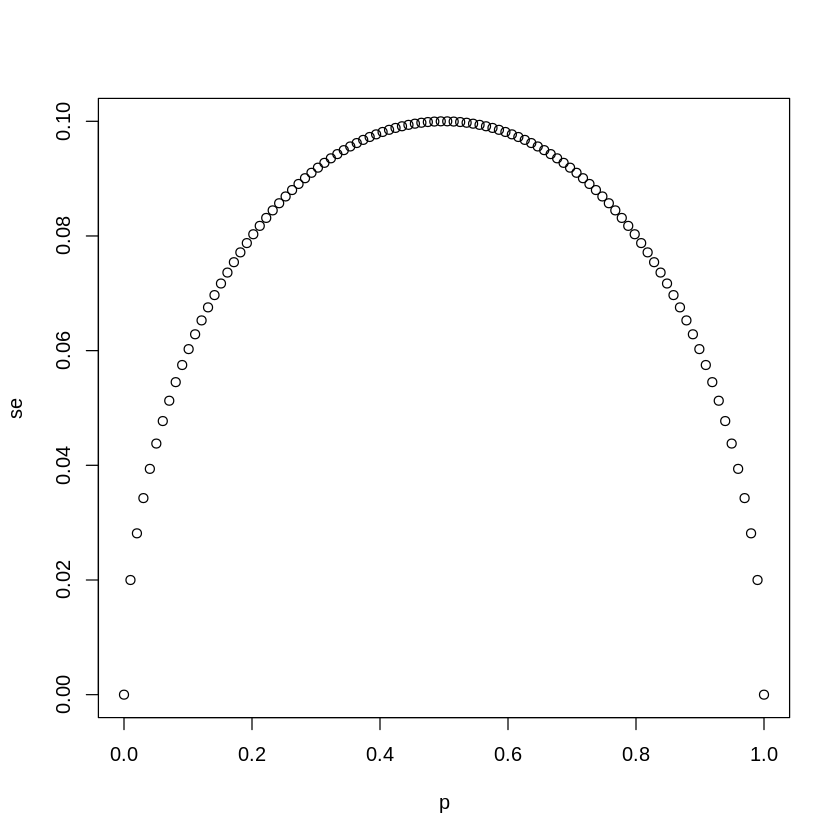

In [1]:
# `N` represents the number of people polled
N <- 25

# Create a variable `p` that contains 100 proportions ranging from 0 to 1 using the `seq` function
 p <- seq(0, 1, length.out=100) 

# Create a variable `se` that contains the standard error of each sample average

se <- sqrt(p * (1-p) / N) 
# Plot `p` on the x-axis and `se` on the y-axis
  plot(p, se)

Exercise 6. Multiple plots of se versus p
Using the same code as in the previous exercise, create a for-loop that generates three plots of p versus se when the sample sizes equal N=25 , N=100 , and N=1000.

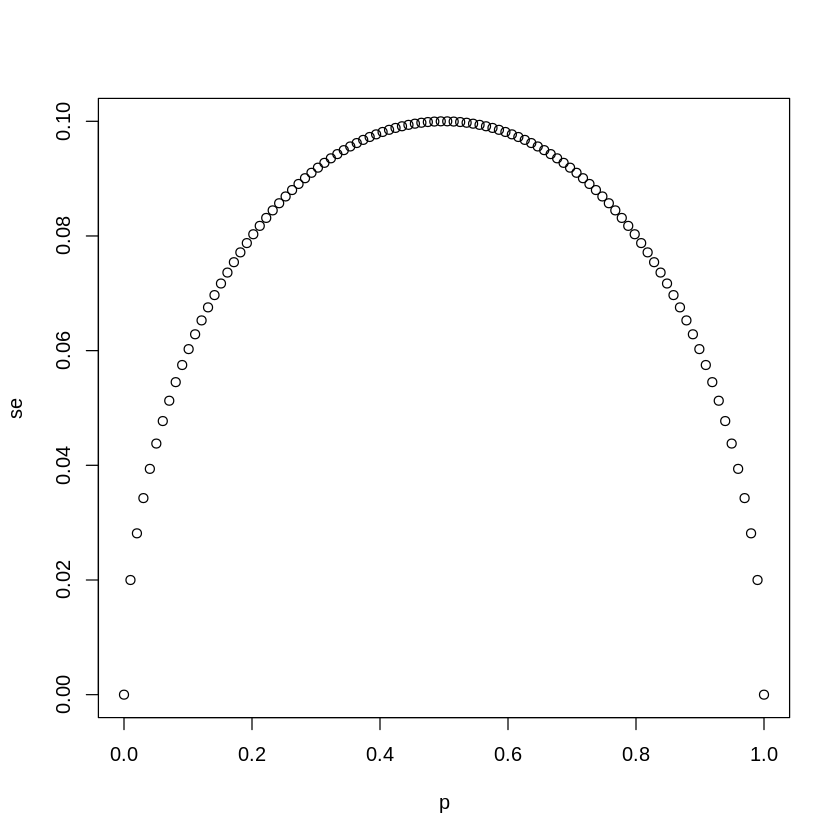

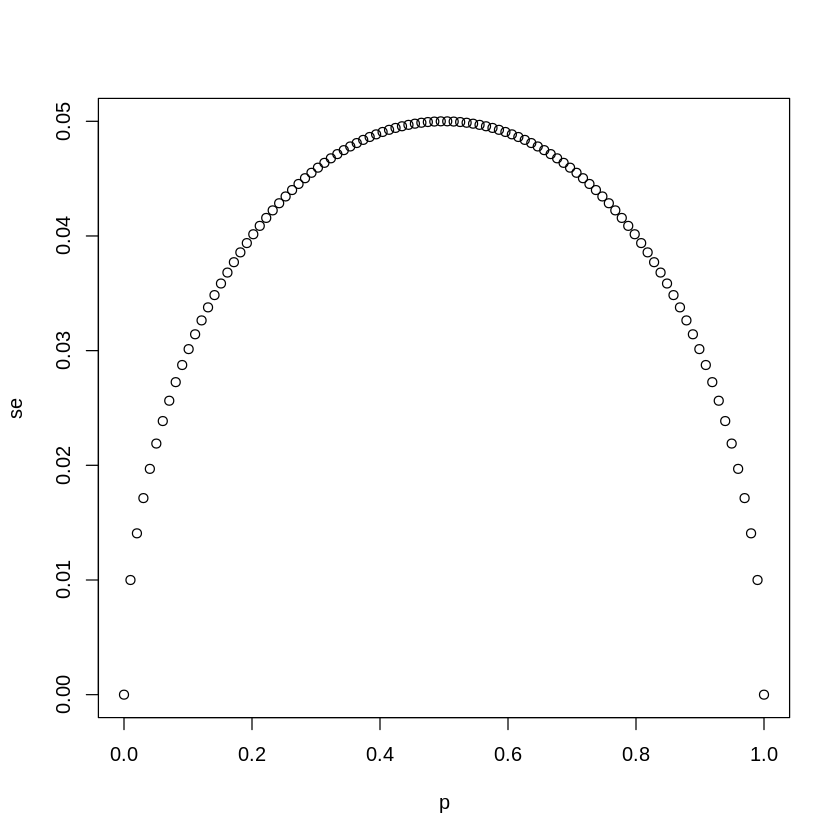

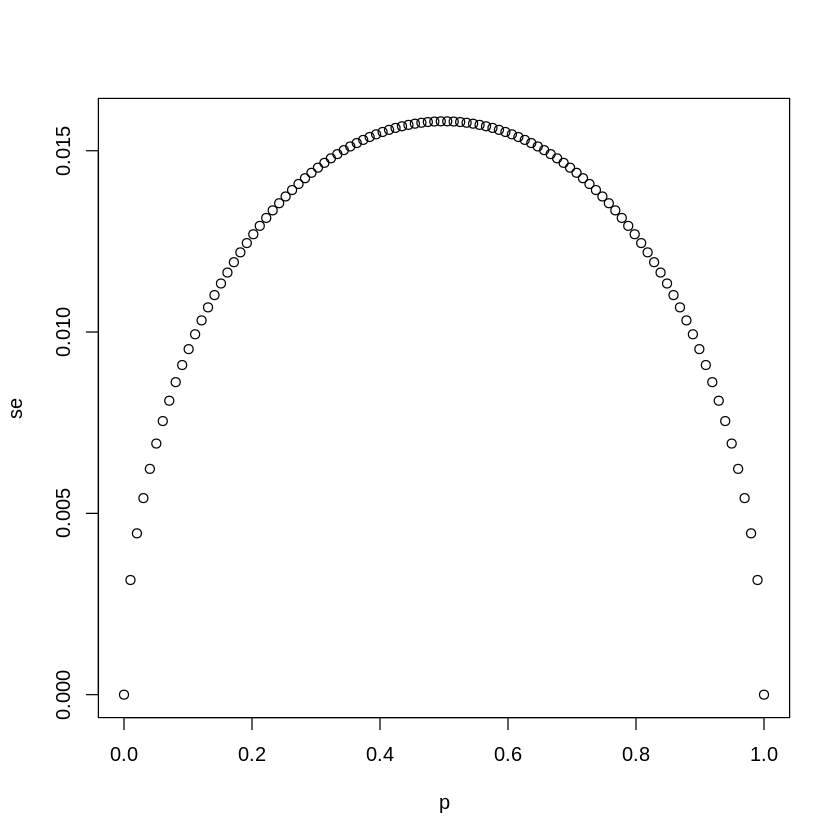

In [2]:
# The vector `p` contains 100 proportions of Democrats ranging from 0 to 1 using the `seq` function
p <- seq(0, 1, length = 100)

# The vector `sample_sizes` contains the three sample sizes
sample_sizes <- c(25, 100, 1000)

# Write a for-loop that calculates the standard error `se` for every value of `p` for each of the three samples sizes `N` in the vector `sample_sizes`. Plot the three graphs, using the `ylim` argument to standardize the y-axis across all three plots.

for (val in sample_sizes) { 
  se <- sqrt(p * (1-p) / val) 
  plot(p, se, ylim=c(0,max(se))) 
}





Exercise 7. Expected value of $d= \overline{X} -(1- \overline{X})$
Our estimate for the difference in proportions of Democrats and Republicans is 
.

Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of d?

$E[\overline{X}-(1-\overline{X})]=E[2\overline{X}-1]=2E[\overline{X}]-1=2p-1=p-(1-p)$

Exercise 8. Standard error of d

$SE[\overline{X}-(1-\overline{X})]=SE[2\overline{X}-1]=2SE[\overline{X}]=2\sqrt{\frac{p(1-p)}{N}}$

Exercise 9. Standard error of the spread
Say the actual proportion of Democratic voters is $p=0.45$ . In this case, the Republican party is winning by a relatively large margin of $d=-0.1$ , or a 10% margin of victory. What is the standard error of the spread $2\overline{X}-1$
 in this case?

In [3]:
# `N` represents the number of people polled
N <- 25

# `p` represents the proportion of Democratic voters
p <- 0.45

# Calculate the standard error of the spread. Print this value to the console.
2 * sqrt(p * (1-p) / N)



[1] 0.1989975

Exercise 10. Sample size
So far we have said that the difference between the proportion of Democratic voters and Republican voters is about 10% and that the standard error of this spread is about 0.2 when $N=25$. Select the statement that explains why this sample size is sufficient or not.

This sample size is too small because the standard error is larger than the spread.